In [2]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import csv

In [3]:
#load assesment file
FB = "resources/HistoricalData_fb.csv"
FB_df = pd.read_csv(FB)
FB_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/24/2021,$324.63,16445360,$318.21,$325.95,$318.03
1,05/21/2021,$316.23,13600900,$319.29,$319.93,$315.8101
2,05/20/2021,$318.61,17320240,$313.58,$319.25,$313.16
3,05/19/2021,$313.59,19106240,$304.185,$314.66,$303.57
4,05/18/2021,$309.96,14522400,$315.59,$316.5,$309.81


CLEAN, RESHAPE AND CONVERT DATATYPE

In [4]:
FB_df['Date']= pd.to_datetime(FB_df['Date'])
FB_df['Close/Last'] = FB_df['Close/Last'].str.replace('$','')
FB_df['Open'] = FB_df['Open'].str.replace('$','')
FB_df['High'] = FB_df['High'].str.replace('$','')
FB_df['Low'] = FB_df['Low'].str.replace('$','')
FB_df = FB_df.apply( pd.to_numeric)

<ipython-input-4-3fd67d6c6cd2>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  FB_df['Close/Last'] = FB_df['Close/Last'].str.replace('$','')
<ipython-input-4-3fd67d6c6cd2>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  FB_df['Open'] = FB_df['Open'].str.replace('$','')
<ipython-input-4-3fd67d6c6cd2>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  FB_df['High'] = FB_df['High'].str.replace('$','')
<ipython-input-4-3fd67d6c6cd2>:5: FutureWarning: The default value of regex will change from True to False in a future version.

FORMAT DATE COLUMN

In [5]:
FB_df['Date']= pd.to_datetime(FB_df['Date'])
FB_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-24,324.63,16445360,318.210,325.95,318.0300
1,2021-05-21,316.23,13600900,319.290,319.93,315.8101
2,2021-05-20,318.61,17320240,313.580,319.25,313.1600
3,2021-05-19,313.59,19106240,304.185,314.66,303.5700
4,2021-05-18,309.96,14522400,315.590,316.50,309.8100


SPLIT DATAFRAME

In [6]:
#setup datetime for first 4 years
start_date = "2016-05-24"
end_date = "2020-05-24"

after_start_date = FB_df["Date"] >= start_date
before_end_date = FB_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
FB_df_4 = FB_df.loc[between_two_dates]
FB_df_4.head()

,Date,Close/Last,Volume,Open,High,Low
252,2020-05-22,234.91,33925560,231.51,235.9900,228.74
253,2020-05-21,231.39,47782640,234.72,237.2000,231.20
254,2020-05-20,229.97,50162880,223.50,231.3400,223.19
255,2020-05-19,216.88,31843150,213.27,220.4900,212.83
256,2020-05-18,213.19,20167440,212.15,214.6445,210.94


SPLIT DATAFRAME

In [7]:
#setup datetime for last year
start_date = "2020-05-25"
end_date = "2021-05-24"

after_start_date = FB_df["Date"] >= start_date
before_end_date = FB_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
FB_df_ls = FB_df.loc[between_two_dates]
FB_df_ls.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-24,324.63,16445360,318.210,325.95,318.0300
1,2021-05-21,316.23,13600900,319.290,319.93,315.8101
2,2021-05-20,318.61,17320240,313.580,319.25,313.1600
3,2021-05-19,313.59,19106240,304.185,314.66,303.5700
4,2021-05-18,309.96,14522400,315.590,316.50,309.8100


PLOT FIRST DF (4YEARS

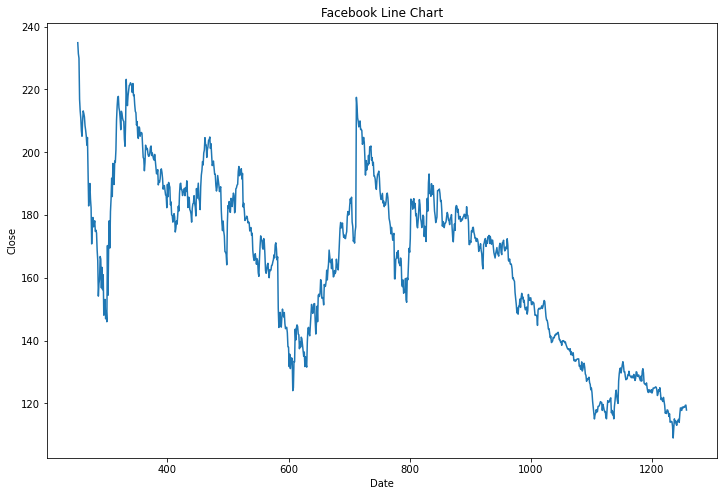

In [9]:
plt.figure(figsize=(12,8))
plt.plot(FB_df_4['Close/Last'])
plt.title("Facebook Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

PLOT SECOND DF (LAST YEAR)

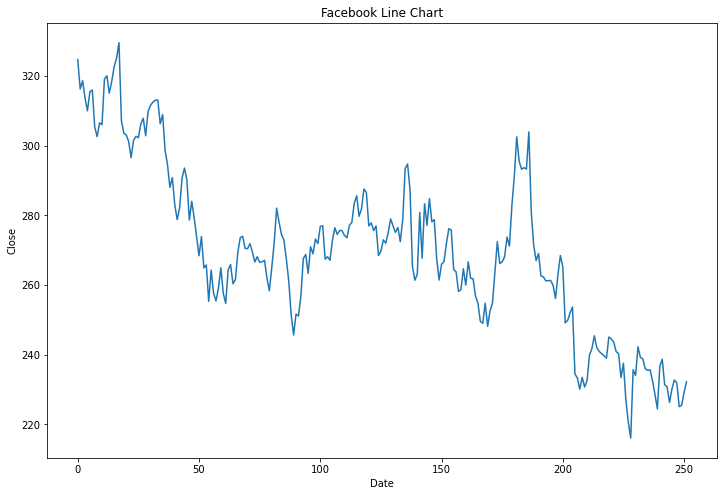

In [10]:
plt.figure(figsize=(12,8))
plt.plot(FB_df_ls['Close/Last'])
plt.title("Facebook Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

SHAPPING, FITTING, TRAINING, TESTING ML ON 1ST DF

In [12]:
FB_df_4.shape

(1006, 6)

In [13]:
X = np.array(FB_df_4['Open']).reshape(1006,-1)
Y = np.array(FB_df_4['Close/Last']).reshape(1006,-1)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X, Y)

LinearRegression()

In [17]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [0.30037687]
coefficient count: 1


In [18]:
from sklearn.metrics import accuracy_score
print('Accuracy:', lr.score(X, Y))

Accuracy: 0.992608787883672


In [19]:
# Predicting the price
lr.predict(X)

array([[231.52151514],
       [234.72750993],
       [223.52150945],
       ...,
       [119.7111984 ],
       [118.3928454 ],
       [118.28298265]])

Text(0.5, 1.0, '4 Years CLosing Price vs Predicted Closing Price')

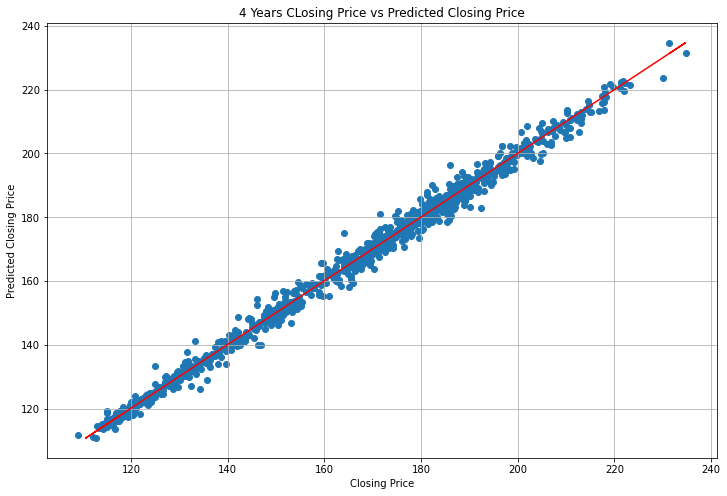

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(FB_df_4['Close/Last'], lr.predict(X))
plt.plot(X, lr.predict(X), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/FB_4y.jpg', dpi=40)
plt.grid()
plt.title('4 Years CLosing Price vs Predicted Closing Price')

TRAINING, TESTING ML ON 2ND DF

In [22]:
FB_df_ls.shape

(252, 6)

In [25]:
X_ls = np.array(FB_df_ls['Open']).reshape(252,-1)
Y_ls = np.array(FB_df_ls['Close/Last']).reshape(252,-1)

In [26]:
lr.fit(X_ls, Y_ls)

LinearRegression()

In [27]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [4.61820212]
coefficient count: 1


In [28]:
print('Accuracy:', lr.score(X_ls, Y_ls))

Accuracy: 0.9622563933971614


In [29]:
# Predicting the price
lr.predict(X_ls)

array([[317.42290526],
       [318.48455976],
       [312.87155308],
       [303.63614192],
       [314.84741008],
       [312.84206268],
       [308.90017883],
       [305.50219631],
       [300.6330359 ],
       [300.25949079],
       [313.62847342],
       [321.52207126],
       [313.79558571],
       [317.40324499],
       [319.20707463],
       [325.24769215],
       [325.2221338 ],
       [329.13059519],
       [306.75720956],
       [303.7295282 ],
       [302.80549557],
       [298.30329407],
       [300.82963858],
       [301.43419184],
       [301.47842745],
       [304.44417896],
       [307.55345043],
       [305.75453586],
       [306.69822875],
       [311.52482469],
       [310.38452911],
       [310.72858381],
       [314.11998014],
       [305.75453586],
       [308.20912039],
       [300.39711267],
       [297.94940924],
       [289.6822663 ],
       [289.52498415],
       [285.53394963],
       [278.19280535],
       [280.82531531],
       [290.67510986],
       [292

Text(0.5, 1.0, '1 Year CLosing Price vs Predicted Closing Price')

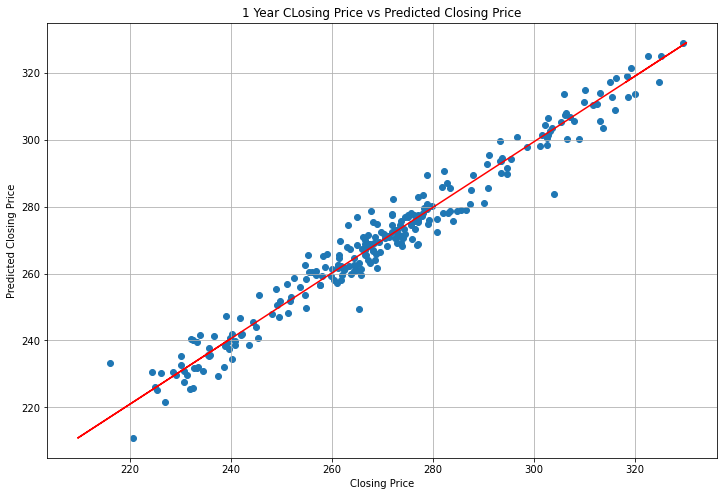

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(FB_df_ls['Close/Last'], lr.predict(X_ls))
plt.plot(X_ls, lr.predict(X_ls), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/FB_ls.jpg', dpi=40)
plt.grid()
plt.title('1 Year CLosing Price vs Predicted Closing Price')